In [221]:
import pandas as pd
import json
import sys
import os
import gensim
import numpy as np
import glob
from sklearn.cluster import KMeans
from gensim.models.doc2vec import Doc2Vec

In [284]:
df_all = pd.DataFrame(columns=[ 'content', 'date_', 'infor', 'source', 'tag','title', 'type', ])
for files in glob.glob('E:/news_project/news_beforeETL/printed_news/printed_news_1040'):
    with open(files,"r", encoding="utf-8") as json_data:
        data = json.load(json_data)
        df = pd.DataFrame.from_dict(data, orient='columns')
        df_all=pd.concat([df_all,df],axis=0,ignore_index=True )
print(df_all.head())

                                             content                 date_  \
0  前總統馬英九（右）30日在立法院出席「青島東很多派對」第3屆國會青年體驗營講座，進場時向一旁...           2018-06-30    
1  國民黨台北市長參選人丁守中（前右）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，...           2018-06-30    
2  國民黨台北市長參選人丁守中（左）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，爭...           2018-06-30    
3  （中央社記者蕭博陽南投縣30日電）總統蔡英文今天視察草屯植物公園，總統肯定草屯鎮長洪國浩施政...  2018-06-30 13:09:41    
4  （中央社記者王淑芬高雄30日電）總統府秘書長陳菊今天南下出席高雄市旗山區圖書分館落成。她說，...  2018-06-30 12:45:41    

                                             infor source  tag  \
0                            2018-06-30 /中央社 /國內政治   中央社   NaN   
1                            2018-06-30 /中央社 /國內政治   中央社   NaN   
2                            2018-06-30 /中央社 /國內政治   中央社   NaN   
3  2018-06-30 13:09:41 /中央社 /國內政治 /中央社記者蕭博陽南投縣30日電   中央社   NaN   
4   2018-06-30 12:45:41 /中央社 /國內政治 /中央社記者王淑芬高雄30日電   中央社   NaN   

                title     type  
0   馬英九出席國會青年體驗營（1）\n  printed  
1      丁守中與吳伯雄同台（2）\n  printed  
2      丁守中與吳伯雄同台（1）\n  printed  
3 

C:\Users\Big data\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [285]:
df=df_all
#df = df.drop(["author"], axis=1)
df = df.drop(["date_"], axis=1)
df = df.drop(["infor"], axis=1)
df = df.drop(["tag"], axis=1)
df = df.drop(["source"], axis=1)
df = df.drop(["type"], axis=1)
#df = df.drop(["url"], axis=1)
print(df)

                                               content  \
0    前總統馬英九（右）30日在立法院出席「青島東很多派對」第3屆國會青年體驗營講座，進場時向一旁...   
1    國民黨台北市長參選人丁守中（前右）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，...   
2    國民黨台北市長參選人丁守中（左）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，爭...   
3    （中央社記者蕭博陽南投縣30日電）總統蔡英文今天視察草屯植物公園，總統肯定草屯鎮長洪國浩施政...   
4    （中央社記者王淑芬高雄30日電）總統府秘書長陳菊今天南下出席高雄市旗山區圖書分館落成。她說，...   
5    （中央社記者魯鋼駿、黃旭昇新北30日電）國民黨新北市長參選人侯友宜近來因文化大學宿舍案惹議。...   
6    （中央社記者游凱翔台北30日電）CNN報導，美國國務院已要求派遣陸戰隊至美國在台協會（AIT...   
7    前總統馬英九（前左）30日出席王雲五誕辰130週年活動，笑稱與王雲五雖相差60幾歲，但曾先後...   
8    前總統馬英九（前）30日出席王雲五誕辰130週年活動，指出王雲五不僅是一名學者、政治家，更是...   
9    （中央社記者謝佳珍、游凱翔台北30日電）軍公教年金改革7月1日上路，退休公教與退伍人員18%...   
10   （中央社記者侯姿瑩台北30日電）美國在台協會（AIT）台北辦事處預計最快9月正式遷至內湖新館...   
11   （中央社記者葉素萍台北30日電）國史館發布新聞稿表示，正積極數位化館藏檔案及上網開放，今年陸...   
12   （中央社記者游凱翔台北30日電）軍人年改7月1日上路前夕，發生寄送退休俸處分書出錯烏龍，為了...   
13   （中央社記者謝佳珍、游凱翔台北30日電）軍公教年金改革7月1日上路，退休公教與退伍人員18%...   
14   （中央社記者游凱翔台北30日電）反軍改聲浪沸騰，不願具名的海軍退役少校說，「錢當然是越多越好...   
15   （中央社記者李淑華台北30日電）「口袋的錢變少了，退休公務員很焦慮，紛紛提出救濟」，考試院高...   
16   （中央社記者顧荃台

In [286]:
print(df.head())

                                             content               title
0  前總統馬英九（右）30日在立法院出席「青島東很多派對」第3屆國會青年體驗營講座，進場時向一旁...   馬英九出席國會青年體驗營（1）\n
1  國民黨台北市長參選人丁守中（前右）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，...      丁守中與吳伯雄同台（2）\n
2  國民黨台北市長參選人丁守中（左）30日在台北出席「中華海峽兩岸客家文經交流協會」會員大會，爭...      丁守中與吳伯雄同台（1）\n
3  （中央社記者蕭博陽南投縣30日電）總統蔡英文今天視察草屯植物公園，總統肯定草屯鎮長洪國浩施政...  墓仔埔變公園 總統肯定洪國浩施政\n
4  （中央社記者王淑芬高雄30日電）總統府秘書長陳菊今天南下出席高雄市旗山區圖書分館落成。她說，...  陳菊：為陳其邁輔選是應該也是責任\n


In [287]:
def split_news(news):
    return " ".join(jieba.cut(news))

def process_news(df):
    df['content'] = df ['content'].apply(split_news)
    df['title'] = df['title'].str.replace('\r','')
    df['title'] = df['title'].str.replace('\n','')
    return df

In [288]:
import jieba
df = process_news(df)

In [289]:
df

content  \
0    前 總統 馬 英九 （ 右 ） 30 日 在 立法院 出席 「 青島東 很多 派 對 」 第...   
1    國民黨 台北市 長 參選人 丁守中 （ 前右 ） 30 日 在 台北 出席 「 中華海峽 兩...   
2    國民黨 台北市 長 參選人 丁守中 （ 左 ） 30 日 在 台北 出席 「 中華海峽 兩岸...   
3    （ 中央社 記者 蕭博陽 南投 縣 30 日電 ） 總統 蔡 英文 今天 視察 草屯 植物 ...   
4    （ 中央社 記者 王淑芬 高雄 30 日電 ） 總統府 秘書長 陳 菊 今天 南下 出席 高...   
5    （ 中央社 記者 魯鋼駿 、 黃 旭 昇 新北 30 日電 ） 國民黨 新北市 長 參選人 ...   
6    （ 中央社 記者 游凱翔 台北 30 日電 ） CNN 報導 ， 美國 國務院 已 要求 派...   
7    前 總統 馬 英九 （ 前 左 ） 30 日 出席 王雲五誕辰 130 週年 活動 ， 笑 ...   
8    前 總統 馬 英九 （ 前 ） 30 日 出席 王雲五誕辰 130 週年 活動 ， 指出 王...   
9    （ 中央社 記者 謝佳珍 、 游凱翔 台北 30 日電 ） 軍 公教 年 金 改革 7 月 ...   
10   （ 中央社 記者 侯姿瑩 台北 30 日電 ） 美國 在 台 協會 （ AIT ） 台北 辦...   
11   （ 中央社 記者 葉素萍 台北 30 日電 ） 國史館 發布 新聞稿 表示 ， 正積 極數 ...   
12   （ 中央社 記者 游凱翔 台北 30 日電 ） 軍人 年 改 7 月 1 日 上路 前夕 ，...   
13   （ 中央社 記者 謝佳珍 、 游凱翔 台北 30 日電 ） 軍 公教 年 金 改革 7 月 ...   
14   （ 中央社 記者 游凱翔 台北 30 日電 ） 反軍改聲 浪沸騰 ， 不願 具名 的 海 軍...   
15   （ 中央社 記者 李淑華 台北 30 日電 ） 「 口袋 的 錢 變少 了 ， 退休 公務員...   
16   （ 中央社 記者 顧荃 台北 30 日電 ） 年 改 7 月 上路 ， 釋憲成 戰場 。 學...   
17   美國 總 統川普 今天 與鴻海 董事 長 大展 好 交情 ， 川普 不但 為 富士康 在 美...   
18   蔡 英文 總統 於 昨日 前往 國防大學 復 興崗 校區 出席 「 一 ○ 七年 三軍六 校...   
19   中國國 防部 發言人 吳謙 表示 ， 租借 太平 島給 美 軍 的 提議 「 十分 危險 」...   
20   立法院 朝野 黨團 今天 協商 公司法 部分 條文 修正 草案 ， 達成 下午 召開 院會 ...   
21   國民黨團 總召林 德福 、 書記長 李彥 秀 、 首席 副 書 記長 曾銘宗 、 副 書 記...   
22   暑期 打工 季節 來臨 ， 很多 學生 紛紛 利用 暑假 賺 零用 錢 。 對此 ， 勞工 ...   
23   為 了 省 下 一筆 錢 ， 有些 老 闆 可能 低 報員 工勞 就 保及 勞退 薪資 。 ...   
24   勞動部 勞工 保險局 今天 表示 ， 從 即日起 放寬 老農津 貼 中 的 排富 條款 ， ...   
25   黨產會 認定 民族 基金 會 、 民權 基金 會 、 國家 發展 基金 會為 國民黨 附 隨...   
26   台經院 今天 發布 五月 製 造 業 景 氣 燈 號 ， 受惠 於 全球 經濟 穩健 成長 ...   
27   高等教育 評鑑 中心 基金 會 今天 公布 一 ○ 六 年度 下半年 第二 週期 校務 評鑑...   
28   台灣 綜合 研究院 今天 發布 最新 經濟 預測 ， 受惠 於 上半年 全球 景氣 持續 擴...   
29   資誠 （ PwC ） 公布 「 二 ○ 一八 全球 市值 百大 企業 排名 」 ， 台積 電...   
..                                                 ...   
270  〔 中央社 台北 訊 〕 國 防部 昨天 發布 新聞稿 指出 ， 現任 軍 情局 局長 劉德...   
271  民調 的 特色 應該 是 公正 客觀 ， 然而 台灣 的 民調 不 造假 才 是 奇 蹟 ，...   
272  侵占 公款 　 女會計 被迫 陪 睡 逼 簽契約 　 色 老 闆 履行 五回 新北市 某 機...   
273  民進 黨 完全 執政 ， 不論 在 中央 或 地方 都 掌握 三分之二 執政版圖 ， 唯獨 ...   
274  〔 記者 陳 忠榮 台北 報導 〕 台北市 長 柯文 哲 昨日 赴 台北 車站 視察防災 演...   
275  〔 記者 陳 忠榮 台北 報導 〕 文大 宿舍 爭議 愈演愈烈 ， 昨日 在 電台 專訪 節...   
276  〔 中央社 台北 訊 〕 台北市 長 柯文 哲 昨天 出席 防災 演習 時 ， 遭台灣國 辦...   
277  中國共產黨 很 現實 、 很務實 ， 也 很 靈活 。 當 六月 十二日 的 川金會 底定 ...   
278  〔 記者 李麗慎 台北 報導 〕 行政院 長 賴清德 昨天 表示 ， 民國 八十六年 修憲 ...   
279  〔 記者 李麗慎 台北 報導 〕 總統 蔡 英文 昨天 主持 原轉會 時 表示 ， 「 轉型...   
280  〔 記者 李麗慎 台北 報導 〕 總統 蔡 英文 昨天 主持 原轉會 支持 委員 伊央 ． ...   
281  〔 記者 李仁龍 台北 報導 〕 國民黨 立委 黃 昭順 與 陳 宜民 昨天 批評 ， 空氣...   
282  〔 記者 李仁龍 台北 報導 〕 立法院 日前 初審 公司法 部份 條文 修正 草案 ， 經...   
283  〔 中央社 台北 訊 〕 行政院 規劃 ○ 到 兩歲 幼兒 將給予 新 台幣 六千元 至 一...   
284  〔 中央社 台中訊 〕 行政院 規劃準 公共 化托育 補助 ， 把 補助 直接 給家長 ， ...   
285  〔 中央社 台北 訊 〕 搶救 少子 化 ， 行政院 祭 出 「 準 公共 化托育 補助 」...   
286  〔 中央社 台北 訊 〕 搶救 少子 化 ， 行政院 祭 出 「 準 公共 化托育 補助 」...   
287  軍改 七月 一日 倉促 上路 ， 發生 退休 俸處 分書 地址 寄錯 或級 職算錯 ， 國民...   
288  軍人 年 金 改革 七月 一日 就要 上路 ， 未料國 防部 寄發 的 「 已退 軍 職人員...   
289  路透社 引述 包括 美國 官員 在 內 的 消息 來源 報導 ， 針對 北京 要求 美國 航...   
290  國民黨 主席 吳敦義遭 媒體 質疑 是 「 無 主席 」 、 「 神隱 」 ， 前 立法院 ...   
291  總統 蔡 英文 二十八日 出席 將官晉 任布 達 暨 授階典禮 ， 她 說 ， 軍人 年 改...   
292  總統 蔡 英文 表示 ， 過去 依賴 核電 ， 但 若 考量 核廢料 處理 ， 核電並 不 ...   
293  台北市 長 柯文 哲 二十八日 上午 前往 台北 車站 視察 演習 情形 時 ， 又 遭 台...   
294  蔡 英文 總統 接受 法新社 專訪 時 表示 ， 台灣 正面 臨中 國大陸 「 巨大 壓力 ...   
295  行政院 長 賴清德 昨日 在 行政院 會 裁示 ， 自民國 一百零八 年 起 省級 機關 預...   
296  美國 共和 黨 「 妥協版 」 改革 移民 法案 二十八日 在 國會 遭遇 重大 失敗 ， ...   
297  前兆 豐銀行 董事 長 蔡友 才 遭金 管會 解職 ， 蔡友 才 提起 行政 訴訟 ， 台北...   
298  國民黨 立委 黃 昭順 表示 ， 空 汙 法 修法 是 打 假球 ， 把 高 屏民眾當 二等...   
299  你 都 多久 洗 一次 澡 ？ 一名 藍姓 男子 指控 ， 他 老婆 婚 後 一年 只 洗 ...   

                       title  
0            馬英九出席國會青年體驗營（1）  
1               丁守中與吳伯雄同台（2）  
2               丁守中與吳伯雄同台（1）  
3           墓仔埔變公園 總統肯定洪國浩施政  
4           陳菊：為陳其邁輔選是應該也是責任  
5         文大宿舍爭議 侯友宜下午親上火線說明  
6     美陸戰隊駐AIT 學者：政治意涵大於軍事意義  
7       馬英九出席王雲五誕辰130週年活動（2）  
8       馬英九出席王雲五誕辰130週年活動（1）  
9         軍公教年改7/1上路 33萬人受影響  
10     AIT回應陸戰隊進駐報導 重申維安作法不變  
11     國史館：上半年195萬頁檔案上網 免費查閱  
12     軍改退休俸處分書出包 200名人力漏夜比對  
13        軍公教年改7

In [290]:
#取出content列為一個list
b=list(df['content'])
b

['前 總統 馬 英九 （ 右 ） 30 日 在 立法院 出席 「 青島東 很多 派 對 」 第 3 屆國會 青年 體驗營 講座 ， 進場 時 向 一旁 守候 的 媒體 致意 。 中央社 記者 施宗暉 攝 \u3000 107 年 6 月 30 日',
 '國民黨 台北市 長 參選人 丁守中 （ 前右 ） 30 日 在 台北 出席 「 中華海峽 兩岸 客家 文經 交流 協會 」 會員大會 ， 爭取 支持 ， 前國民黨 主席 吳伯雄 （ 前 左 ） 也 到場 。 中央社 記者 吳翊寧攝 \u3000 107 年 6 月 30 日',
 '國民黨 台北市 長 參選人 丁守中 （ 左 ） 30 日 在 台北 出席 「 中華海峽 兩岸 客家 文經 交流 協會 」 會員大會 ， 爭取 支持 ， 與 前 國民黨 主席 吳伯雄 （ 前 ） 同台 。 中央社 記者 吳翊寧攝 \u3000 107 年 6 月 30 日',
 '（ 中央社 記者 蕭博陽 南投 縣 30 日電 ） 總統 蔡 英文 今天 視察 草屯 植物 公園 ， 總統 肯定 草屯 鎮長 洪國浩 施政 能力 讓 「 墓 仔埔變 公園 」 ， 並使鎮 公所 財政 從 負債 到 盈餘 ， 施政 就 像 魔術師 ， 希望 洪國浩未來 可為 南投人 做 更 多事 。 蔡總統 上午 到 草屯 鎮視察 植物 公園 ， 由同 黨籍 南投 縣長 參選人 、 草屯 鎮長 洪國浩 簡報 ， 黨籍 立委 蔡培慧 、 林靜儀 等 人 陪同 出席 。 洪國浩向 總統 進行 20 分鐘 簡報 ， 說明 植物 公園 如何 從 「 墓 仔埔變 公園 」 、 建置 生態 滯洪池 、 草坪 廣場 、 健 行步 道 等 園區 規劃 。 總統 聽 完 簡報 高度肯定 洪國浩政績 ， 稱 讚 植物 公園 不僅 吸引 許多 縣民遊憩 ， 還有 許多 北部 人來 露營 ， 因此 草屯 鎮又有 一項 新物產 就是 「 墓 仔埔變 植物 園 」 ， 聞名 全台 ， 相信 大家 都 肯定 鎮長 洪國浩 的 治理 能力 。 蔡總統致 詞時 說 ， 處理 墳 墓 問題 需面 臨許 多 困難 ， 還要 很 有 耐心 、 不斷 溝通 ， 才 有 辦法 做到 ， 對 於 洪國浩願 意花費 許多 時間 和 精力 處理 ， 讓 墓 仔埔變 植物 公園 ， 感到 非常 感動 ， 尤其 鎮

In [291]:
### 取所有'content'欄位的值
# df.loc[:,['content']]

### 取第0個值_行，在第0個欄位('content')_欄
# t=df.iloc[0,0]
# print(type(t))

### 文檔放到list中
# data = []
# for d in range(0,300):
#     t=df.iloc[d,0]
#     data.append(t)

In [292]:
TaggededDocument=gensim.models.doc2vec.TaggedDocument

In [293]:
x_train=[]
for i, text in enumerate(b):
    word_list = text.split(' ')
    l = len(word_list)
    word_list[l-1]=word_list[l-1].strip()
    document=TaggededDocument(word_list,tags=[i])
    x_train.append(document)
print(x_train)
c = x_train
c

[TaggedDocument(words=['前', '總統', '馬', '英九', '（', '右', '）', '30', '日', '在', '立法院', '出席', '「', '青島東', '很多', '派', '對', '」', '第', '3', '屆國會', '青年', '體驗營', '講座', '，', '進場', '時', '向', '一旁', '守候', '的', '媒體', '致意', '。', '中央社', '記者', '施宗暉', '攝', '\u3000', '107', '年', '6', '月', '30', '日'], tags=[0]), TaggedDocument(words=['國民黨', '台北市', '長', '參選人', '丁守中', '（', '前右', '）', '30', '日', '在', '台北', '出席', '「', '中華海峽', '兩岸', '客家', '文經', '交流', '協會', '」', '會員大會', '，', '爭取', '支持', '，', '前國民黨', '主席', '吳伯雄', '（', '前', '左', '）', '也', '到場', '。', '中央社', '記者', '吳翊寧攝', '\u3000', '107', '年', '6', '月', '30', '日'], tags=[1]), TaggedDocument(words=['國民黨', '台北市', '長', '參選人', '丁守中', '（', '左', '）', '30', '日', '在', '台北', '出席', '「', '中華海峽', '兩岸', '客家', '文經', '交流', '協會', '」', '會員大會', '，', '爭取', '支持', '，', '與', '前', '國民黨', '主席', '吳伯雄', '（', '前', '）', '同台', '。', '中央社', '記者', '吳翊寧攝', '\u3000', '107', '年', '6', '月', '30', '日'], tags=[2]), TaggedDocument(words=['（', '中央社', '記者', '蕭博陽', '南投', '縣', '30', '日電', '）', '總統', '蔡', '英文

[TaggedDocument(words=['前', '總統', '馬', '英九', '（', '右', '）', '30', '日', '在', '立法院', '出席', '「', '青島東', '很多', '派', '對', '」', '第', '3', '屆國會', '青年', '體驗營', '講座', '，', '進場', '時', '向', '一旁', '守候', '的', '媒體', '致意', '。', '中央社', '記者', '施宗暉', '攝', '\u3000', '107', '年', '6', '月', '30', '日'], tags=[0]),
 TaggedDocument(words=['國民黨', '台北市', '長', '參選人', '丁守中', '（', '前右', '）', '30', '日', '在', '台北', '出席', '「', '中華海峽', '兩岸', '客家', '文經', '交流', '協會', '」', '會員大會', '，', '爭取', '支持', '，', '前國民黨', '主席', '吳伯雄', '（', '前', '左', '）', '也', '到場', '。', '中央社', '記者', '吳翊寧攝', '\u3000', '107', '年', '6', '月', '30', '日'], tags=[1]),
 TaggedDocument(words=['國民黨', '台北市', '長', '參選人', '丁守中', '（', '左', '）', '30', '日', '在', '台北', '出席', '「', '中華海峽', '兩岸', '客家', '文經', '交流', '協會', '」', '會員大會', '，', '爭取', '支持', '，', '與', '前', '國民黨', '主席', '吳伯雄', '（', '前', '）', '同台', '。', '中央社', '記者', '吳翊寧攝', '\u3000', '107', '年', '6', '月', '30', '日'], tags=[2]),
 TaggedDocument(words=['（', '中央社', '記者', '蕭博陽', '南投', '縣', '30', '日電', '）', '總統', '蔡', 

*sentences：可以是一个list，对于大语料集，建议使用BrownCorpus,Text8Corpus或lineSentence构建。
*size：是指特征向量的维度，默认为100。
*alpha: 是初始的学习速率，在训练过程中会线性地递减到min_alpha。
*window：窗口大小，表示当前词与预测词在一个句子中的最大距离是多少。
*min_count:可以对字典做截断. 词频少于min_count次数的单词会被丢弃掉, 默认值为5。
*max_vocab_size: 设置词向量构建期间的RAM限制，设置成None则没有限制。
*sample: 高频词汇的随机降采样的配置阈值，默认为1e-3，范围是(0,1e-5)。
*seed：用于随机数发生器。与初始化词向量有关。
*workers：用于控制训练的并行数。
*min_alpha：学习率的最小值。
*sg： 用于设置训练算法，默认为0，对应CBOW算法；sg=1则采用skip-gram算法。
*hs: 如果为1则会采用hierarchica·softmax技巧。如果设置为0（默认），则使用negative sampling。
*negative: 如果>0,则会采用negativesampling，用于设置多少个noise words（一般是5-20）。
*cbow_mean: 如果为0，则采用上下文词向量的和，如果为1（default）则采用均值，只有使用CBOW的时候才起作用。
*hashfxn： hash函数来初始化权重，默认使用python的hash函数。
*iter： 迭代次数，默认为5。
*trim_rule： 用于设置词汇表的整理规则，指定那些单词要留下，哪些要被删除。可以设置为None（min_count会被使用）。
*sorted_vocab： 如果为1（默认），则在分配word index 的时候会先对单词基于频率降序排序。
*batch_words：每一批的传递给线程的单词的数量，默认为10000。

In [294]:
model=Doc2Vec(x_train, min_count=1, window=3, vector_size=300, negative=5,workers=4)
model.train(x_train,total_examples=model.corpus_count,epochs=10)

In [295]:
model_dm=model

In [296]:
#預測新句子的向量Paragraph vector了,這裡用gensim裡infer_vector(),
#預測新的句子，這裡根據經驗，alpha（學習步長）設置小一些，
#迭代次數設置大一些。找到訓練樣本中與這個句子最相近的10個句子。
#可以看到訓練出來的結果與測試的新句子是有關聯的。
strl=df.iloc[10,0]
test_text=strl.split(' ')
#得到向量array命名為inferred_vector
inferred_vector=model_dm.infer_vector(doc_words=test_text,alpha=0.025,steps=500)

sims=model_dm.docvecs.most_similar([inferred_vector],topn=5)
sims

C:\Users\Big data\AppData\Local\Programs\Python\Python36\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(110, 0.5560179352760315),
 (192, 0.5453572869300842),
 (57, 0.5429027080535889),
 (6, 0.5363553166389465),
 (195, 0.5356584787368774)]

In [297]:
#找到與特定文章strl相似的文章

for count, sim in sims:
    print(count,sim)
    sentence = c[count]
    words = ''
    
    for word in sentence[0]:
        words = words + word +' '
    print(words,sim,len(sentence[0]))
    

110 0.5560179352760315
【 記者 簡玲穎 台北 報導 】 日本 產經 新聞 報導 專訪 外交部 長 吳釗燮 的 內容 ， 中國 駐 日 使館 向 產經 抗議 ， 指報 導主張 台獨 。 外交部 28 日 說 ， 中國 干預 日本 、 台灣 的 新聞 、 言論 自由 ， 對 這樣 的 作法 ， 「 完全 無法 接受 」 。 產經 早報 27 日 報導 專訪 吳釗燮 的 內容 ， 吳釗燮 表示 ， 日本 和 台灣 同樣 面臨 中國 軍事 與 威脅 ， 呼籲台 日 進行 安全 保障 對話 。 報導 指出 ， 台日 沒有 邦交 ， 高級 官員 要求 雙方 對 話 實屬 罕見 ； 但 中國 在 台灣 周邊 軍事動作 頻頻 ， 吳釗燮 盼台 日進 一步 加強關 係 因應 。 不過 ， 產經 電子 報 昨 27 日 晚間 報導 ， 中國 駐 日 使館 已 向 產經 新聞 提出 抗議 ， 指台灣 是 中國 的 一部 份 ， 報導 主張 台灣 獨立 ， 中國 強烈 反對 。 對此 ， 外交部 發言人 李憲章 28 日 在 外交部 例行 新聞 說 明會 回應 媒體詢 問時 指出 ， 中國 的 做法 嚴重 干 預新聞 獨立 與 自由 。 中國 威權 專制 ， 不但 沒有 容忍 國內 新聞 、 言論 自由 的 空間 ， 還進 一步 干預 日本 、 台灣 的 新聞 、 言論 自由 。 李憲章 說 ， 對 於 中國 這樣 的 作法 ， 「 我們 覺得 完全 沒有 辦法 接受 」 。 這也 顯示 中國 的 作法 已經 嚴重 威脅 自由 、 民主 的 普世價值 理念 ； 外交部 呼籲 理念 相近 國家團 結起 來 ， 共同 阻止 這樣 趨勢 的 蔓延 。 對 於 媒體 問及 中國施 壓國際 航空公司 更改 對 台灣 的 稱呼 矮化 台灣 ， 李憲章 強調 ， 中國大陸 打壓 台灣 無 所 不 在 ， 並擴 及 國際 企業 和 航空公司 ， 外交部 對 遭到 中國施 壓 的 企業 深表同情 。 他 說 ， 中國大陸 打壓 台灣 的 做法 ， 不僅 引起 台灣 人民 憤慨 ， 也 在 國際上 犯眾 怒 ， 公然 違背 國際 貿易 自由 的 原則 跟 精神 。 2018 / 6 / 28 矮化 台灣   日國會 議員 看不下去 【 本報 綜合 報導 】 針對 中國 民航局 強制 要

In [298]:
#跑很久喔!請小心
#所有的文章都得到固定長度的vec
df['d2v_Vec']='0'
for i in range(0,300):
    strl=df.iloc[i,0]
    test_text=strl.split(' ')
    #得到向量array命名為inferred_vector
    inferred_vector=model_dm.infer_vector(doc_words=test_text,alpha=0.025,steps=500)
    
    df.loc[i,'d2v_Vec']=inferred_vector
    
print(df.head())    

                                             content             title  \
0  前 總統 馬 英九 （ 右 ） 30 日 在 立法院 出席 「 青島東 很多 派 對 」 第...   馬英九出席國會青年體驗營（1）   
1  國民黨 台北市 長 參選人 丁守中 （ 前右 ） 30 日 在 台北 出席 「 中華海峽 兩...      丁守中與吳伯雄同台（2）   
2  國民黨 台北市 長 參選人 丁守中 （ 左 ） 30 日 在 台北 出席 「 中華海峽 兩岸...      丁守中與吳伯雄同台（1）   
3  （ 中央社 記者 蕭博陽 南投 縣 30 日電 ） 總統 蔡 英文 今天 視察 草屯 植物 ...  墓仔埔變公園 總統肯定洪國浩施政   
4  （ 中央社 記者 王淑芬 高雄 30 日電 ） 總統府 秘書長 陳 菊 今天 南下 出席 高...  陳菊：為陳其邁輔選是應該也是責任   

                                             d2v_Vec  
0  [0.869036, -0.053034984, -0.0800606, 0.2099731...  
1  [1.0821755, 0.59363794, -0.9338337, 0.40782142...  
2  [0.8350927, 0.5773781, -0.98052835, 0.58106405...  
3  [1.2560748, 1.6408994, -0.7270374, 2.3576539, ...  
4  [1.4483427, 1.866701, -0.6246986, 0.37652883, ...  


In [299]:
infered_vectors_list=list(df['d2v_Vec'])
infered_vectors_list

[array([ 8.69036019e-01, -5.30349836e-02, -8.00606012e-02,  2.09973097e-01,
         4.27859098e-01, -4.72573906e-01,  2.63857633e-01,  2.70710200e-01,
        -1.50704622e-01, -7.35196173e-01, -5.41411638e-01, -7.32583225e-01,
         3.20574820e-01,  2.54637808e-01,  2.89016813e-01,  5.93137681e-01,
         1.97446540e-01, -1.04958698e-01, -3.15796763e-01, -7.15354502e-01,
        -1.28599316e-01,  1.16773009e+00,  1.08997834e+00, -2.57186979e-01,
         5.63829727e-02, -6.75891578e-01,  3.59409787e-02,  1.80883005e-01,
        -1.17417336e+00,  2.02717762e-02, -4.06400114e-02, -1.11177063e+00,
         7.46959329e-01, -5.29017389e-01,  6.92601502e-01, -5.07666349e-01,
         6.27884269e-01,  1.25910819e+00, -4.20717806e-01, -5.62761426e-01,
        -3.61568004e-01,  1.62054253e+00, -3.42088193e-01,  6.42278790e-01,
         3.18953574e-01, -1.49839029e-01,  5.01529837e-04,  1.19839661e-01,
         1.15728152e+00,  1.71890676e-01,  5.96484303e-01,  1.49919540e-01,
        -1.3

In [300]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline
scores=[]
ks=[]

for i in range(2, 11):
    clu = KMeans(n_clusters= i)
    clu.fit(infered_vectors_list)
    clu_score = silhouette_score(infered_vectors_list, clu.labels_)
    scores.append(clu_score)
    ks.append(i)

分數 : [0.15605901, 0.1438313, 0.091104865, 0.13624203, 0.11461656, 0.11498047, 0.1411956, 0.13231508, 0.10070878]
K值 : [2, 3, 4, 5, 6, 7, 8, 9, 10]


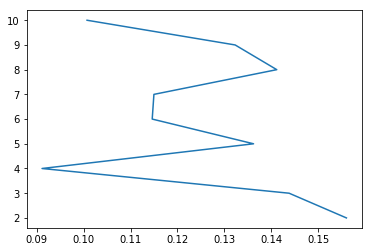

In [301]:
print("分數 :", scores)
print("K值 :", ks)
plt.plot(scores, ks)

In [280]:
from sklearn.cluster import KMeans
clu=(KMeans(n_clusters= 5))
clu.fit(infered_vectors_list)
clu.labels_

array([3, 1, 1, ..., 2, 4, 2])

In [281]:
df['group']='0'
# df
for idx in range(0,1173):
    df.loc[idx, 'group'] = clu.labels_[idx]


In [282]:
df

content  \
0     「 打破 重來 ， 你 泥 中 有 我 ， 我 泥 中 有 你 。 」 唱起歌 來 是 浪漫...   
1     廣東 《 南方周末 》 新年 獻詞 事件 ， 顯然 正 引發 更 大風波 。 海外 媒體 大...   
2     司法院 院會 日前 通過 「 司法院 大法官 審理 案件 法 」 修正 草案 ， 擬議 大幅...   
3     最近 幾天 ， 大學 教授 假發票 事件 越演 越烈 ， 幾乎 形成 大學學術 社群 與 司...   
4     許多 大學生 整天 耗在 網路 ， 但 網路 世界 充斥 各種 辛辣 的 言 詞 謾 罵 ，...   
5     去年 十月 勞保 基金 傳出 可能 提前 虧損 ， 引發民眾 擠 兌風潮 ， 最新 數字 顯...   
6     新北 市政府 為 了 即 時 協助 有 急 難 需求 的 兒童 及 青少年 ， 特別 結合 ...   
7     雖然 ， 美國 白宮 與 國會 終究 在 最後關 頭達成 協議 ， 避免 「 財政 懸崖 」...   
8     英文 中有 「 BLESSING   IN   DISGUISE 」 的 說法 ， 意指 有...   
9     過去 ， 瓏 山林 對 於 不肯 「 配合 」 其建案 推行 的 縣 市政府 ， 通常 也 ...   
10    過去 一年 的 台灣 經濟 ， 有如 乘坐 雲霄 飛車 ， 忽高忽低 、 驚險 萬分 。 從...   
11    部分 學生 團體 近日 再度 串聯 、 發起 反媒體 壟斷 的 動員 ， 民進 黨 主席 蘇...   
12    美國 「 財政 懸崖 」 緊急 警報 可望 暫時 解除 ， 但 在 緩衝 期間 啟動 的 部...   
13    八仙 塵 爆案 滿 4 個 月 ， 一位 傷者 日前 因 併 發症 導致 心肺 衰竭 而 去...   
14    距離 年底 僅剩 兩個 月 ， 以往 廠商 已 開始 為 耶誕 節訂 單加緊 趕工 ， 今年...   
15    含 鉛 自來 水管 風波 延燒 超過 一 星期 ， 政府 部門 未能 切入 問題 核心 採取...   
16    國民黨 換柱 由 朱立倫 主席 帶 領小雞 打選戰 ， 果然 對民 進黨 選情 產生 壓力 ...   
17    本月 25 日 ， 美國 《 華盛頓 時報 》 （ WASHINGTON   TIMES ）...   
18    南海 風 雲 再起 ， 美軍飛彈 驅逐 艦拉森號 在 中國大陸 強烈 警告 下 ， 穿越 大...   
19    美國前 國務院 東亞助 卿 坎貝爾 在 華府 智庫 戰略 與 國際 研究 中心 表示 ， 台...   
20    台北市 長 柯文 哲 上周 在 台北市 議會 專案 報告 公共 住宅 政策 時 表示 ： 「...   
21    就 長 期 趨勢 觀察 ， 台灣 股市 逐漸 走弱 ， 不但 不及 大陸 及亞洲 四小龍 其...   
22    大陸國家 主席 習近 平訪 英 ， 把 中英 兩國關 係 推上 了 歷史 高峰 ， 雙方 發...   
23    朱立倫以 洪秀柱 的 兩岸 論述 背離 了 「 國民黨 政策 」 為 理由 發動 換柱 ， ...   
24    國民黨 總統 參選人 朱立倫 自嘲 ， 有人 說 他 是 「 馬 英九 2.0 」 ， 蔡 ...   
25    朱立倫 在 中國 國民黨 臨時 全代會 換柱 獲得 提名 後 ， 立即 對 蔡 英文 射出 ...   
26    今年 是 對 日 抗戰勝利 70 周年 ， 兩岸 官方 與民間 都 進行 了 許多 深具 意...   
27    夏張會 落幕 ， 我方 殷切 期待 的 陸客 中轉 與 航路 優化 脫鉤 問題 並無共識 ，...   
28    造成 嚴重 傷亡 的 八仙 塵 爆案 偵結 ， 檢方 只 起訴 玩色 創意 負責人 呂忠吉 ...   
29    號稱 台灣 首宗 大型 敵意 併 購案 「 日 月光 收購 矽品 股權案 」 ， 周四 召開...   
...                                                 ...   
1143  內閣 改組 在 即 ， 政治 學者 出身 的 江宜 樺 副 院長 奉命 組閣 ， 在 財經 ...   
1144  前 總統 陳 水扁 戒護 就醫 迄今 ， 情況 始終 不 穩定 ， 甚至 有 精神科 醫師 ...   
1145  根據 內政部 日前 公布 的 人口 統計 結果 ， 截至 民國 一 ○ 一 年底 我國 老化...   
1146  內閣 正在 進行 改組 ， 農 曆 新年 馬 上 來 到 ， 大家 都 冀望 國泰 民安 風...   
1147  內閣 改組 的 消息 日前 經總統府 證實 ： 江宜 樺 接院 長 、 毛治國接 副 院長 ...   
1148  年 關將 至 ， 雲林縣 日前 卻 發生 一家 四口 集體 自殺 悲劇 ， 令人 不勝 唏噓...   
1149  馬 總統 昨天 在 總統府 親自 召開 記者 會 ， 邀集 行政院 長 陳 冲 、 立法院 ...   
1150  酒駕 害人害己 ， 近年 幾成 社會 公害 。 馬 英九總統 日前 與 酒 駕團 體座 談 ...   
1151  年 金 改革方案 即將 正式 出爐 ， 然而 ， 多數 討論 集中 於 退休 公務員 的 待...   
1152  行政院 長 陳 冲 在 接受 本報 專訪 時 指出 ， 十八 趴必須 要 調整 ， 這是 社...   
1153  四年 前 ， 面對 次級 房貸 風暴 重創 金融 業 、 匹茲堡 汽車 廠 幾乎 奄奄一息 ...   
1154  知 名企 業家 尹衍 樑 先生 將於 近日 宣布 設置 東方諾 貝爾獎 ： 唐獎 。 據 報...   
1155  二 ○ 一二年 九月 十一日 ， 日本 一意孤行 ， 逕 自 對 釣 魚 台 列 嶼 施行 ...   
1156  台灣 社會過 去 數年 只要 一遇 選舉 、 一經 撩 撥 ， 幾個 議題 就 會 像 回鍋...   
1157  立法院 第八 屆 第二 會期 上周 結束 ， 通過 了 六十九 項 法案 、 兩項 預算案 ...   
1158  美國 總統 歐巴馬 第二 任期 就 職演 說 ， 與 其 說 是 揭 櫫 理念 ， 不如 說...   
1159  馬 總統 連任 第一年 ， 民意 聲望 直線 下滑 ， 馬 政府 政策 步調 混亂 ， 決策...   
1160  新年伊始 ， 馬 英九總統剛 在 元旦 文告 裡 慷慨 陳 辭 ， 要求 行政部 門 「 多...   
1161  全國大學 校長 會議 日前 在 佛光 大學 閉幕 ， 一如 往常 討論 一些 制度 鬆 綁 ...   
1162  日本 政權 更替 、 安倍 上任 後 不到 一個 月 ， 日圓 匯率 就 貶值 超過 十 ％...   
1163  轟動 一時 的 士林 文 林苑 都 更 事件 ， 最近 有 新 的 發展 ： 十多名 同意 ...   
1164  馬 英九總統 十五日 接見 美國 聯邦 參議員穆 考斯 基時 表示 ， 兩岸關 係 與 台美...   
1165  十二年 國教 即將 於 明年 正式 實施 ， 主要 變革 之一 是 廢除 基測 ， 改考國 ...   
1166  從言論 到 行動 ， 從船 艦到 戰機 ， 從 單機 到 多架次 ， 中國大陸 近來 宣示 ...   
1167  考試 院長 關中 倡議 公務員 退休 應該 從 現行 的 「 八五 制 」 再延 長 為 「...   
1168  從 今天 開始 ， 本報 正式 推出 「 未來 領袖 論國 是 」 系列 專版 ， 今後將 ...   
1169  元月 九日 是 美國 故 總統 尼克森 百歲 誕辰 。 門生 故舊 與 家人 在 華府 「 ...   
1170  十多年 前 ， 龍應 台剛 接任 台北市 文化局 長 不久 ， 在 台北市 議會 被 問到 ...   
1171  立法院 修法 、 立法 粗糙 不是 新聞 ， 不過 ， 這次 立法院 朝野 政黨 就 廣電三...   
1172  立法院 民進 黨團 前天 提出 有線 廣播 電視法 修正 條文 ， 大幅 緊縮 媒體 產業 ...   

                                                  title  \
0                                 《社論》凍省殷鑑 組改不能沒強有力主導機制   
1                                《楊渡專欄》改變中國的兩個關鍵詞：憲政與微博   
2                                   《社論》釋憲阻礙大移除 民權保障大進步   
3                                   《社論》大學假發票盛行 校長不能裝惦惦   
4                                           前財長：勿躲在網路世界   
5                                  

In [276]:
### 取第0個值_行，在第0個欄位('content')_欄
print(df.iloc[[10,93,610,926,1125],[0,3]])

                                                content group
10    過去 一年 的 台灣 經濟 ， 有如 乘坐 雲霄 飛車 ， 忽高忽低 、 驚險 萬分 。 從...     3
93    台灣 經濟 陷入困境 ， 出口 兩位數 衰退 、 第 2 季經濟 成長 率 低 到 只有 0...     3
610   國發會 發布 4 月 景氣 對策 信號 連續 第 3 個 月亮 出綠燈 ， 綜合 判斷 分數...     3
926   主計 總處甫 公布 第 2 季經濟 成長 率 數值 ， 由 初值 之 2.27 ％ 年增率 ...     2
1125  行政院 主計 總處 上周 公布 的 最新 經濟 成長 報告 ， 預測 今年 台灣 的 經濟 ...     3


In [277]:
df[df['group'] == 3]

content  \
7     雖然 ， 美國 白宮 與 國會 終究 在 最後關 頭達成 協議 ， 避免 「 財政 懸崖 」...   
9     過去 ， 瓏 山林 對 於 不肯 「 配合 」 其建案 推行 的 縣 市政府 ， 通常 也 ...   
10    過去 一年 的 台灣 經濟 ， 有如 乘坐 雲霄 飛車 ， 忽高忽低 、 驚險 萬分 。 從...   
12    美國 「 財政 懸崖 」 緊急 警報 可望 暫時 解除 ， 但 在 緩衝 期間 啟動 的 部...   
15    含 鉛 自來 水管 風波 延燒 超過 一 星期 ， 政府 部門 未能 切入 問題 核心 採取...   
20    台北市 長 柯文 哲 上周 在 台北市 議會 專案 報告 公共 住宅 政策 時 表示 ： 「...   
21    就 長 期 趨勢 觀察 ， 台灣 股市 逐漸 走弱 ， 不但 不及 大陸 及亞洲 四小龍 其...   
27    夏張會 落幕 ， 我方 殷切 期待 的 陸客 中轉 與 航路 優化 脫鉤 問題 並無共識 ，...   
29    號稱 台灣 首宗 大型 敵意 併 購案 「 日 月光 收購 矽品 股權案 」 ， 周四 召開...   
31    近日 媒體 報導 了 兩則 經濟 新聞 ， 一是 台灣 出口 持續 衰退 拖累 GDP 成長...   
32    雲林縣 堆置 兩萬噸 垃圾 無去 處 ， 立法院 找來 環保署 長 魏國彥當 面商 議 ， ...   
36    科技 業界 流傳 一句 戲言 ， 全球 互聯網 分成 兩種 ， 一種 是 中國 的 網路 （...   
38    日前 《 泰晤士 報 》 高等教育 特刊 （ TIMES   HIGHER   EDUCAT...   
50    颱 風史 上 「 杜鵑 」 留下 的 紀錄 ， 不是 蘇澳 的 17 級 強陣風 ， 也 不...   
53    中國大 陸國家 主席 習近 平 前往 美國 進行 7 天 的 「 國是 訪問 」 ， 首站 ...   
56    一個 多月 前 ， 台灣 智慧 手機 龍頭宏達 電爆 裁員千人 以上 ， 日前 傳出餐 飲龍...   
61    50 歲 的 金鐘 獎廣播 獎項 昨日 頒獎 ， 典禮 雖稱 流暢 ， 卻 顯得 激情 不再...   
64    如同 日前 貴報 社論 〈 反對 劫 貧濟富 ， 競選 補助 應 廢除 〉 的 看法 ， 我...   
67    登革熱 疫情 失控 ， 上周 平均 每天 新增 510 名 病例 ， 較前 周 提高 1.6...   
70    拜讀 貴報 10 日 社論 〈 反對 劫 貧濟富 ， 競選 補助 應 廢除 〉 ， 心有 戚...   
71    號稱 「 共享 經濟 」 的 網路 叫車 平台 UBER 在 很多 國家 引起 爭議 ， 同...   
72    隨著 2016 總統 選戰 升溫 ， 高人氣 的 台北市 長 柯文 哲開始 全省 跑 透透 ...   
78    民進 黨 總統 參選人 蔡 英文 日前 公開 表示 ， 民進 黨 執政 後 「 絕對 不會 ...   
79    敘利亞 小 難民溺 斃伏屍 土耳其 海灘 的 畫面 撼動 歐洲 的 難民 政策 。 澳洲 總...   
87    距離 明年初 的 大選 投票 ， 只有 半年 不到 的 時間 了 ， 而 截至 目前 為止 ...   
90    台灣 經濟會 走上 今日 困窘 境地 ， 最 重要 的 因素 是 中國 崛起 ， 原本 既 ...   
91    全球 發展 良好 的 經濟體 ， 不論 政治 體制 是 民主 或是 接近 威權 ， 經濟 體...   
92    如果 後 人 回顧 進入 21 世紀 後 的 國際 經貿 變化 ， 主軸 必然 是 FTA ...   
93    台灣 經濟 陷入困境 ， 出口 兩位數 衰退 、 第 2 季經濟 成長 率 低 到 只有 0...   
101   大陸 人民 銀 行使 出殺 手 （ 金閒 ） ， 讓 人民 幣兌 美元 匯率 中間價 一次 ...   
...                                                 ...   
1038  馬 總統 第二 任期 今天 滿 一周年 ， 民眾 滿意度 低迷 ， 讓 就 職 周年 少 了...   
1039  老年 年 金 制度 不但 影響 到 個 人 一生 中 的 財務 安排 ， 且 因其收 、 支...   
1072  大陸國家 主席 習近 平 最近 在 博鰲 論壇 上 說 ， 「 今 後 五年 ， 中國將 進...   
1076  早在民國 一 ○ ○ 年 八月 ， 中央研究院 翁 啟惠院 長 等 人 發表 了 「 人才 ...   
1077  北韓 十日 未如 外界 預期 發射 飛彈 ， 但 十一日 揚言 彈頭 上 已 輸入 精確 的...   
1084  日前 內政部長 李鴻源 提出 老松國 小 改建 為 社會 住宅 的 構想 ， 因為 老松國 ...   
1088  馬 政府 連任 後 ， 從 中央 到 地方 ， 從 首長 到民代 ， 弊案 連環 爆 ， 比...   
1095  有 房市 空頭 司令 稱號 的 台北市 新任 副 市長 張金鶚 ， 就任 首日 就 宣示 要...   
1096  三年 前 ， 副 總統 吳敦義擔 任 行政院 長 時期 ， 曾經 說 了 一段 話 ： 平常...   
1097  不論 由 政治 、 經濟 或 社會 、 資訊 流通 等 觀點 看 ， 一個 產業 或 一個 ...   
1098  《 CHEERS 》 雜誌 新近 發表 的 調查 顯示 ， 今年 最受 職場 新鮮人 青睞 ...   
1106  近年 來 中國大陸 地區 工資大漲 ， 政策 上 又 出現 重視 環保 與 汙染 防治 的 ...   
1109  核四 公投 的 討論 中 ， 首先 上場 的 是 公民投票 應否 納入 不 在籍 投票 機制...   
1110  今天 是 日本 三 一一 福島 核災 兩 周年 日 ， 核電未來 發展 的 討論 持續 在 ...   
1111  農 曆 年前 ， Ｂ Ｂ Ｃ 有 一則關 於 目前 英國年 輕人 處境 的 報導 ， 內容 ...   
1119  立法院 新會期 開議 ， 新任 行政院 長 江宜 樺 展現 企圖心 ， 面對 公眾 對 核四...   
1121  第八 十五 屆 奧斯卡 金像 獎頒獎 典禮 於 台灣 時間 二十五日 早上 在 美國 加州 ...   
1123  很少 一個 政府 推動 一個 大型 計畫 ， 出現 如此 不堪 、 顏面 盡失 的 結果 ！...   
1125  行政院 主計 總處 上周 公布 的 最新 經濟 成長 報告 ， 預測 今年 台灣 的 經濟 ...   
1130  年前 尾牙 ， 裕隆 集團 董事 長 嚴凱 泰酒 後 一席 「 用 蘋果 （ 與 三星 ） ...   
1131  春節 放 假期 間 ， 有 部分 立法 委員以 「 奢侈 稅實際 上 收到 的 稅太少 」 ...   
1143  內閣 改組 在 即 ， 政治 學者 出身 的 江宜 樺 副 院長 奉命 組閣 ， 在 財經 ...   
1145  根據 內政部 日前 公布 的 人口 統計 結果 ， 截至 民國 一 ○ 一 年底 我國 老化...   
1146  內閣 正在 進行 改組 ， 農 曆 新年 馬 上 來 到 ， 大家 都 冀望 國泰 民安 風...   
1148  年 關將 至 ， 雲林縣 日前 卻 發生 一家 四口 集體 自殺 悲劇 ， 令人 不勝 唏噓...   
1155  二 ○ 一二年 九月 十一日 ， 日本 一意孤行 ， 逕 自 對 釣 魚 台 列 嶼 施行 ...   
1156  台灣 社會過 去 數年 只要 一遇 選舉 、 一經 撩 撥 ， 幾個 議題 就 會 像 回鍋...   
1161  全國大學 校長 會議 日前 在 佛光 大學 閉幕 ， 一如 往常 討論 一些 制度 鬆 綁 ...   
1162  日本 政權 更替 、 安倍 上任 後 不到 一個 月 ， 日圓 匯率 就 貶值 超過 十 ％...   
1172  立法院 民進 黨團 前天 提出 有線 廣播 電視法 修正 條文 ， 大幅 緊縮 媒體 產業 ...   

                                                  title  \
7                                 《社論》財政懸崖還有續集 台灣借鏡別踩紅線   
9                                     得罪林榮三…尤清、廖學廣遭「修理」   
10                  《社論》展望2013系列之二／經濟篇 調整結構拚競爭力 才是最嚴峻挑戰   
12    撙節抑制成長 美難逃經濟衰退 財政緊縮規模為原定的1/3 預期今年經濟成長率只有1.9％ 政...   
15                                      《社論》政府正在醞釀一場鉛風暴   
20                                 